In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
data = pd.read_csv("forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [17]:
correlation = data.corr('pearson')

In [18]:
correlation['area'].sort_values()

RH     -0.075519
rain   -0.007366
ISI     0.008258
wind    0.012317
FFMC    0.040122
Y       0.044873
DC      0.049383
X       0.063385
DMC     0.072994
temp    0.097844
area    1.000000
Name: area, dtype: float64

In [27]:
x = data['DMC']
y = data['area']

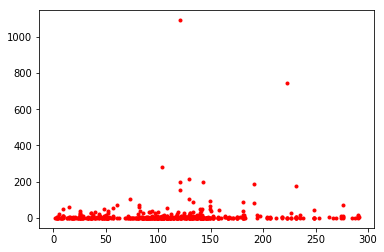

In [28]:
plt.plot(x,y,'r.')

In [30]:
x = np.array(x)
y = np.array(y)

In [33]:
scaler = MinMaxScaler()

In [34]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [35]:
x.shape

(517, 1)

In [36]:
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

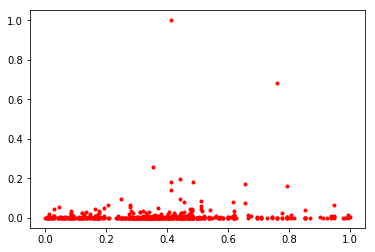

In [37]:
plt.plot(x,y,'r.')

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [42]:
regressor = LinearRegression() 

In [43]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_pred = regressor.predict(x_test)

In [45]:
y_pred

array([[0.01466545],
       [0.01517611],
       [0.01132399],
       [0.00882676],
       [0.01248701],
       [0.00808585],
       [0.00810946],
       [0.01201472],
       [0.00860242],
       [0.01070411],
       [0.01357328],
       [0.00930495],
       [0.01080152],
       [0.00863194],
       [0.00926953],
       [0.01277038],
       [0.01104357],
       [0.01204719],
       [0.01050044],
       [0.00804452],
       [0.01204719],
       [0.01279105],
       [0.01157785],
       [0.00840169],
       [0.01466545],
       [0.01112622],
       [0.01023182],
       [0.01055357],
       [0.01059785],
       [0.01132399],
       [0.00993369],
       [0.01096682],
       [0.01201177],
       [0.01517611],
       [0.01144502],
       [0.01204719],
       [0.01319544],
       [0.01144502],
       [0.01318954],
       [0.01104062],
       [0.0107661 ],
       [0.01078381],
       [0.01086056],
       [0.01089008],
       [0.01302424],
       [0.00882676],
       [0.01114098],
       [0.009

In [46]:
for i in zip(y_pred,y_test):
    print(i)

(array([0.01466545]), array([0.]))
(array([0.01517611]), array([0.]))
(array([0.01132399]), array([0.00154926]))
(array([0.00882676]), array([0.]))
(array([0.01248701]), array([0.]))
(array([0.00808585]), array([0.]))
(array([0.00810946]), array([0.04746801]))
(array([0.01201472]), array([0.]))
(array([0.00860242]), array([0.]))
(array([0.01070411]), array([0.]))
(array([0.01357328]), array([0.01497011]))
(array([0.00930495]), array([0.00748047]))
(array([0.01080152]), array([0.00242015]))
(array([0.00863194]), array([0.00849804]))
(array([0.00926953]), array([0.00761798]))
(array([0.01277038]), array([0.]))
(array([0.01104357]), array([0.]))
(array([0.01204719]), array([0.]))
(array([0.01050044]), array([0.00184262]))
(array([0.00804452]), array([0.]))
(array([0.01204719]), array([0.18011807]))
(array([0.01279105]), array([0.00599538]))
(array([0.01157785]), array([0.00043086]))
(array([0.00840169]), array([0.]))
(array([0.01466545]), array([0.]))
(array([0.01112622]), array([0.001503

In [56]:
mean_squared_error(y_test,y_pred)

0.004966716276553581

Text(0.5,1,'Linear Regression(train)')

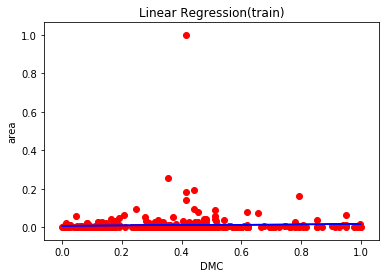

In [49]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),'b')

plt.xlabel("DMC")
plt.ylabel("area")
plt.title("Linear Regression(train)")

In [50]:
r2_score(y_test,y_pred) 

0.007550528152944214

In [57]:
accuracy = 1- mean_squared_error(y_test,y_pred)
accuracy

0.9950332837234465